In [1]:
!pip install plotly==4.14.3

     |████████████████████████████████| 13.2 MB 5.6 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=18896821d70d83d23ead5b7e33215e22fb9bb0608b01a399f5d4b330dd242299
  Stored in directory: /Users/lavi/Library/Caches/pip/wheels/ce/18/7f/e9527e3e66db1456194ac7f61eb3211068c409edceecff2d31
Successfully built retrying


In [3]:
!pip install matplotlib
!pip install seaborn

     |████████████████████████████████| 8.5 MB 7.0 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 1.5 MB/s eta 0:00:011
  Using cached Pillow-8.1.0-cp39-cp39-macosx_10_10_x86_64.whl (2.2 MB)
     |████████████████████████████████| 285 kB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 30.9 MB 12.7 MB/s eta 0:00:01


In [93]:
!pip install scikit-learn

In [23]:
#!pip install pandas-profiling==2.5.0

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly 
import plotly.graph_objs as go
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/thecraigd/Avocado-Prices/master/data/avocado.csv")
df.head()

# reference - https://www.kaggle.com/neuromusic/avocado-prices 
#4046 , 4225 and 4770 are avocado types product number and their respective volumen 
# total volume -> 4046+4225+4770+Smallbags+Large Bags+XLBags 
#tota_Bags volume is Small bags + Large Bags + XLargeBags

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0  0           2015-12-27  1.33          64236.62      1036.74  54454.85    
1  1           2015-12-20  1.35          54876.98      674.28   44638.81    
2  2           2015-12-13  0.93          118220.22     794.70   109149.67   
3  3           2015-12-06  1.08          78992.15      1132.00  71976.41    
4  4           2015-11-29  1.28          51039.60      941.48   43838.39    

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0  48.16   8696.87     8603.62     93.25       0.0          conventional   
1  58.33   9505.56     9408.07     97.49       0.0          conventional   
2  130.50  8145.35     8042.21     103.14      0.0          conventional   
3  72.58   5811.16     5677.40     133.76      0.0          conventional   
4  75.78   6183.95     5986.26     197.69      0.0          conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [7]:
print ("Rows     : " ,df.shape[0]) # printing Rows numbers

Rows     :  18249


In [8]:
print ("Columns  : " ,df.shape[1]) # Printing Columns numbers

Columns  :  14


In [9]:
print ("\nFeatures : \n" ,df.columns.tolist()) # Printing name of features


Features : 
 ['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']


In [10]:
print ("\nMissing values :  ", df.isnull().sum().values.sum()) # Checking missing values


Missing values :   0


In [11]:
print ("\nUnique values :  \n",df.nunique()) # Unique values in each columns


Unique values :  
 Unnamed: 0      53   
Date            169  
AveragePrice    259  
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags     5588 
type            2    
year            4    
region          54   
dtype: int64


In [12]:
df.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean   24.232232     1.405978      8.506440e+05  2.930084e+05  2.951546e+05   
std    15.481045     0.402677      3.453545e+06  1.264989e+06  1.204120e+06   
min    0.000000      0.440000      8.456000e+01  0.000000e+00  0.000000e+00   
25%    10.000000     1.100000      1.083858e+04  8.540700e+02  3.008780e+03   
50%    24.000000     1.370000      1.073768e+05  8.645300e+03  2.906102e+04   
75%    38.000000     1.660000      4.329623e+05  1.110202e+05  1.502069e+05   
max    52.000000     3.250000      6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04  18249.000000    
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04  3106.426507     
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05  17692.894652    
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000        
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02  0.000000        
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03  0.000000        
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04  132.500000      
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean   2016.147899   
std    0.939938      
min    2015.000000   
25%    2015.000000   
50%    2016.000000   
75%    2017.000000   
max    2018.000000

# EDA

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

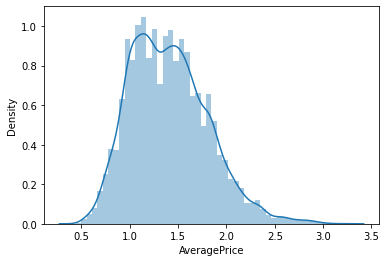

In [14]:
sns.distplot(df['AveragePrice'])

In [16]:
byDate=df.groupby('Date').mean()
byDate.head()

Unnamed: 0  AveragePrice  Total Volume           4046  \
Date                                                                
2015-01-04  50.990741   1.301296      7.840216e+05  306465.358704   
2015-01-11  49.990741   1.370648      7.273686e+05  287260.786944   
2015-01-18  48.990741   1.391111      7.258221e+05  294469.507963   
2015-01-25  47.990741   1.397130      7.080211e+05  299121.600648   
2015-02-01  46.990741   1.247037      1.106048e+06  465675.823704   

                     4225          4770     Total Bags     Small Bags  \
Date                                                                    
2015-01-04  341213.318796  21100.172593  115242.790648  91759.341667    
2015-01-11  303781.757778  21751.550463  114574.490370  95860.522407    
2015-01-18  293167.054907  20446.764352  117738.747593  97674.575093    
2015-01-25  267862.244167  19244.248704  121793.027500  100715.897685   
2015-02-01  469409.541481  34143.419537  136819.689815  107192.904167   

              Large Bags  XLarge Bags    year  
Date                                           
2015-01-04  23015.332407  468.116574   2015.0  
2015-01-11  18313.259259  400.708704   2015.0  
2015-01-18  19866.538241  197.634259   2015.0  
2015-01-25  20859.406667  217.723148   2015.0  
2015-02-01  28462.864722  1163.920926  2015.0

Text(0.5, 1.0, 'Average Price')

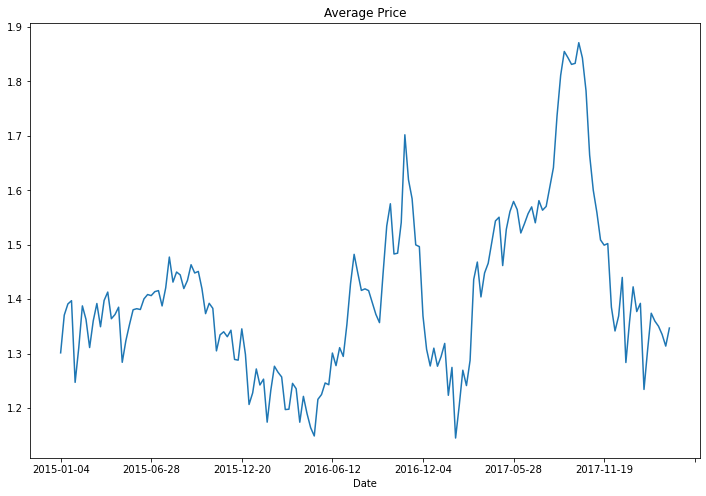

In [15]:
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

In [17]:
# conventional and organic - Two types of AVOCADA
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [24]:
# from pandas_profiling import ProfileReport

In [25]:
# profile = ProfileReport(df, title="Pandas Profiling Report")
# profile.to_file("your_report.html")

In [134]:
df_conventional = df[df['type'] == 'conventional']
df_organic = df[df['type'] == 'organic']

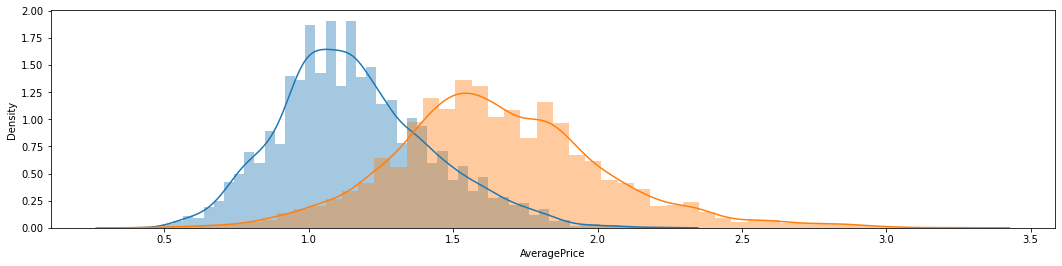

In [135]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))

sns.distplot(df_conventional['AveragePrice']) # histogram
sns.distplot(df_organic['AveragePrice']) # histogram
plt.show()

- Organic prices are high compare to conventional Avacoda

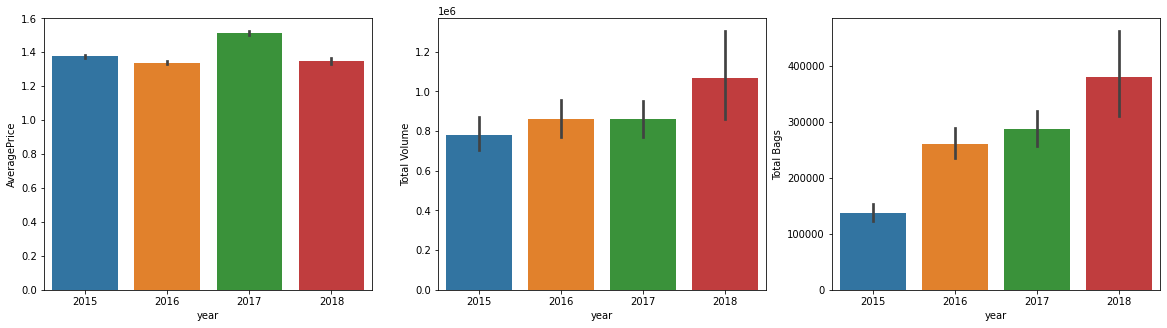

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(20,5))
sns.barplot(df['year'],df['AveragePrice'],ax=ax[0])
sns.barplot(y=df['Total Volume'],x=df['year'],ax=ax[1])
sns.barplot(y=df['Total Bags'],x=df['year'],ax=ax[2])

In [28]:
df_org = df[df.type.isin(["organic"])]
df_org_final = df.groupby(["Date"]).mean()
df_org_final["Date"] = df_org_final.index
df_org_final["Type"] = "organic"
df_org_final.head()

Unnamed: 0  AveragePrice  Total Volume           4046  \
Date                                                                
2015-01-04  50.990741   1.301296      7.840216e+05  306465.358704   
2015-01-11  49.990741   1.370648      7.273686e+05  287260.786944   
2015-01-18  48.990741   1.391111      7.258221e+05  294469.507963   
2015-01-25  47.990741   1.397130      7.080211e+05  299121.600648   
2015-02-01  46.990741   1.247037      1.106048e+06  465675.823704   

                     4225          4770     Total Bags     Small Bags  \
Date                                                                    
2015-01-04  341213.318796  21100.172593  115242.790648  91759.341667    
2015-01-11  303781.757778  21751.550463  114574.490370  95860.522407    
2015-01-18  293167.054907  20446.764352  117738.747593  97674.575093    
2015-01-25  267862.244167  19244.248704  121793.027500  100715.897685   
2015-02-01  469409.541481  34143.419537  136819.689815  107192.904167   

              Large Bags  XLarge Bags    year        Date     Type  
Date                                                                
2015-01-04  23015.332407  468.116574   2015.0  2015-01-04  organic  
2015-01-11  18313.259259  400.708704   2015.0  2015-01-11  organic  
2015-01-18  19866.538241  197.634259   2015.0  2015-01-18  organic  
2015-01-25  20859.406667  217.723148   2015.0  2015-01-25  organic  
2015-02-01  28462.864722  1163.920926  2015.0  2015-02-01  organic

In [29]:
df_con = df[df.type.isin(["conventional"])]
df_con_final = df_con.groupby(["Date"]).mean()
df_con_final["Date"] = df_con_final.index
df_con_final["Type"] = "conventional"

In [30]:
df_final = pd.concat([df_con_final, df_org_final])

fig = px.line(
    df_final, x="Date", y="AveragePrice", color="Type", title="Avocado Price"
)
fig.show()

In [31]:
avg_pr=df.groupby('region')['AveragePrice'].mean().sort_values(ascending=False).values
loc=df.groupby('region')['AveragePrice'].mean().sort_values(ascending=False).index

In [32]:
avg_pr

array([1.81863905, 1.80420118, 1.72757396, 1.63213018, 1.62156805,
       1.6060355 , 1.60192308, 1.5610355 , 1.55677515, 1.55511834,
       1.53423077, 1.53088757, 1.52032544, 1.51683432, 1.51328402,
       1.51094675, 1.50621302, 1.505     , 1.47739645, 1.44559172,
       1.44257396, 1.43650888, 1.4306213 , 1.42849112, 1.40884615,
       1.40476331, 1.40328402, 1.39816568, 1.39801775, 1.39532544,
       1.38091716, 1.36431953, 1.34813609, 1.3385503 , 1.33795858,
       1.31902367, 1.31772189, 1.31399408, 1.3047929 , 1.29133136,
       1.28668639, 1.27609467, 1.27221893, 1.26170149, 1.25278107,
       1.24792899, 1.22443787, 1.21857988, 1.21600592, 1.21210059,
       1.20920118, 1.1012426 , 1.08559172, 1.04792899])

In [33]:
loc

Index(['HartfordSpringfield', 'SanFrancisco', 'NewYork', 'Philadelphia',
       'Sacramento', 'Charlotte', 'Northeast', 'Albany', 'Chicago',
       'RaleighGreensboro', 'BaltimoreWashington', 'Boston', 'Syracuse',
       'BuffaloRochester', 'HarrisburgScranton', 'Jacksonville', 'Orlando',
       'GrandRapids', 'NorthernNewEngland', 'Spokane', 'Seattle', 'Plains',
       'StLouis', 'MiamiFtLauderdale', 'Tampa', 'Midsouth', 'SouthCarolina',
       'SanDiego', 'Southeast', 'California', 'LasVegas', 'Pittsburgh',
       'Boise', 'GreatLakes', 'Atlanta', 'TotalUS', 'Portland', 'Indianapolis',
       'NewOrleansMobile', 'RichmondNorfolk', 'Louisville', 'Detroit', 'West',
       'WestTexNewMexico', 'Columbus', 'Roanoke', 'PhoenixTucson', 'Denver',
       'LosAngeles', 'Nashville', 'CincinnatiDayton', 'SouthCentral',
       'DallasFtWorth', 'Houston'],
      dtype='object', name='region')

<AxesSubplot:ylabel='region'>

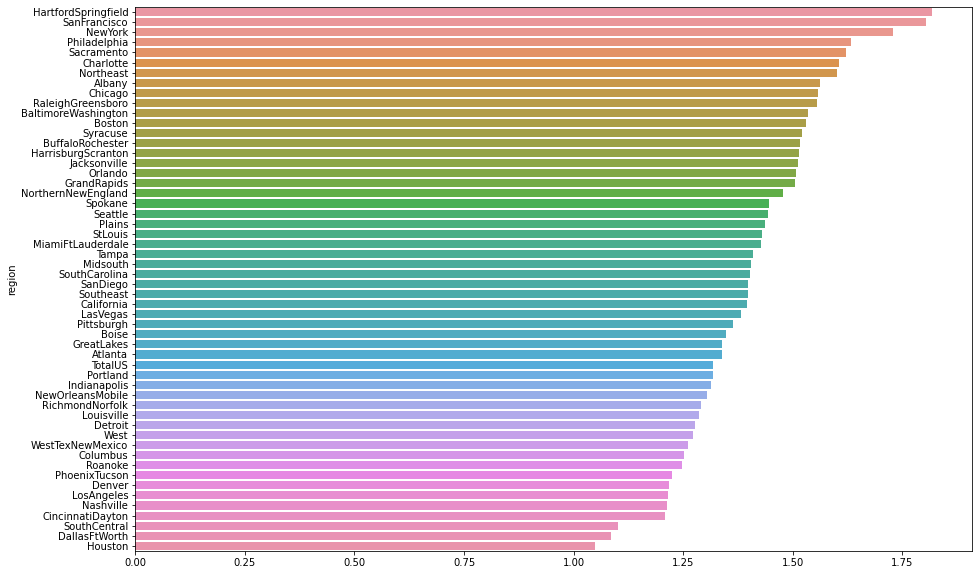

In [34]:
plt.figure(figsize=(15,10))
sns.barplot(x=avg_pr,y=loc)

In [35]:
df['Date']=pd.to_datetime(df['Date'])
df['month']=df['Date'].dt.month

In [36]:
px.box(df,x='month',y='AveragePrice')

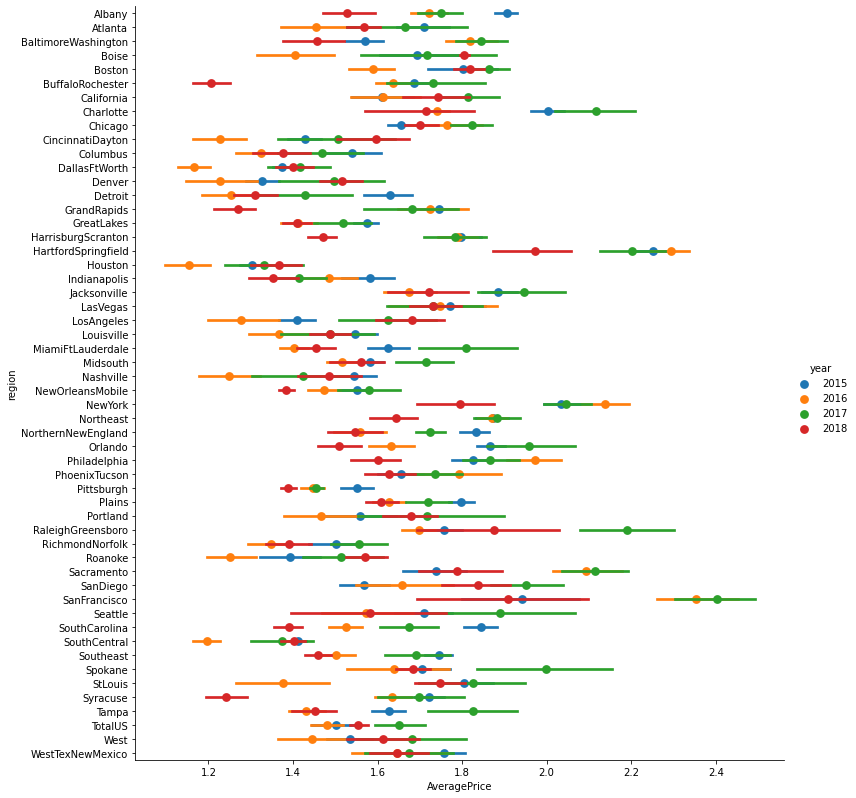

In [37]:
df_organic=df[df['type']=='organic']
df_conventional=df[df['type']=='conventional']
sns.factorplot('AveragePrice','region',data=df_organic,hue='year',height=11,join=False)

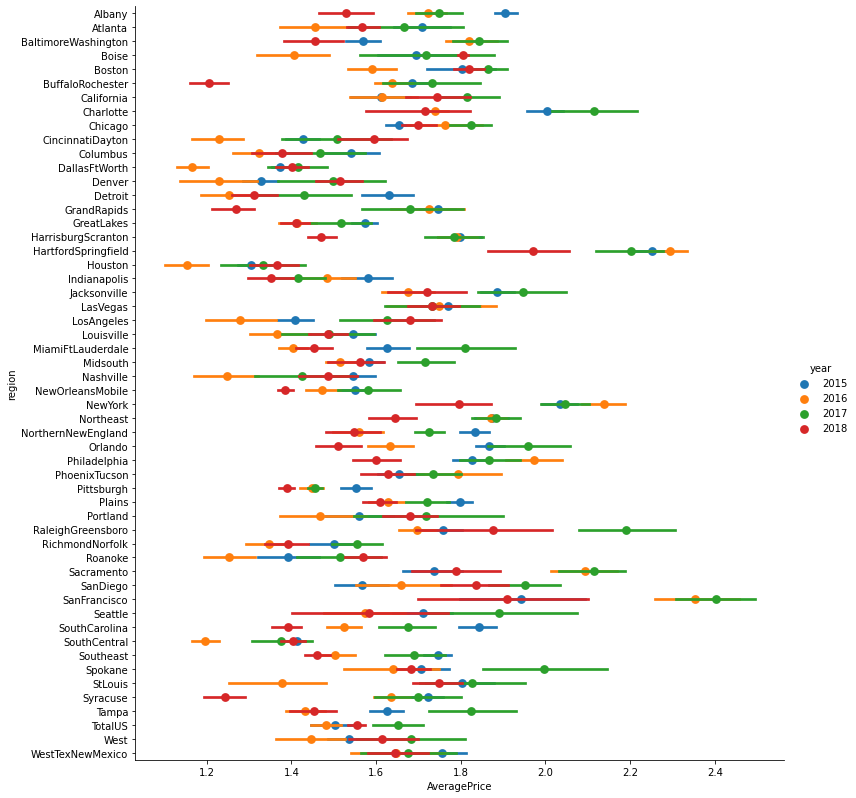

In [39]:
sns.factorplot('AveragePrice','region',data=df_organic,hue='year',height=11,join=False)

since there was shortage in supply in 2017 sanfrancisco witnessed high prices

In [40]:
org_val=df_organic.groupby(['region'])['AveragePrice'].mean().values
org_ind=df_organic.groupby(['region'])['AveragePrice'].mean().index
con_val=df_conventional.groupby(['region'])['AveragePrice'].mean().values
con_ind=df_conventional.groupby(['region'])['AveragePrice'].mean().index
fig = go.Figure()
fig.add_trace(go.Scatter(x=org_ind, y=org_val,mode='markers+lines',name='Oragnic'))
fig.add_trace(go.Scatter(x=con_ind, y=con_val,mode='markers+lines',name='Conventional'))
fig.update_layout(title='organic vs Conv wrt to region')

###lets see how they change wrt to year

In [44]:
A=df.groupby(['type','year','region',])['AveragePrice'].mean().reset_index()
A.head()
fig=px.line(A, x="region", y="AveragePrice", animation_frame="year",color='type')
fig.update_layout(title='change in avg_price of both type wrt to year ')

lets check how avegare_price changes wrt to Seasons spring runs from March 1 to May 31; summer runs from June 1 to August 31; `fall (autumn) runs from September 1 to November 30; and winter runs from December 1 to February 28 (February 29 in a leap year).`

In [45]:
conditions=[(df['month'].between(3,5,inclusive=True)),
           (df['month'].between(6,8,inclusive=True)),
           (df['month'].between(9,11,inclusive=True)),
           (df['month'].between(12,2,inclusive=True))]
values=['Spring','Summer','Fall','Winter']
df['seasons'] = np.select(conditions, values)

In [46]:
df['seasons'].replace('0','Winter',inplace=True)

In [47]:
df.seasons.value_counts()

Winter    5075
Spring    4752
Fall      4212
Summer    4210
Name: seasons, dtype: int64

In [52]:
B=df.groupby(['year','type','region','seasons'])['AveragePrice'].mean().reset_index()
B.head()

year          type   region seasons  AveragePrice
0  2015  conventional  Albany   Fall    1.155385    
1  2015  conventional  Albany   Spring  1.165714    
2  2015  conventional  Albany   Summer  1.239231    
3  2015  conventional  Albany   Winter  1.124167    
4  2015  conventional  Atlanta  Fall    1.027692

Animated lineplot of season vs price wrt each year

In [54]:
px.line(B,x='region',y='AveragePrice',facet_col='seasons',facet_col_wrap=2,color='type',animation_frame='year')

Which Season has high price and volume consumed

Text(0.5, 1.0, 'Season vs Total_VOl')

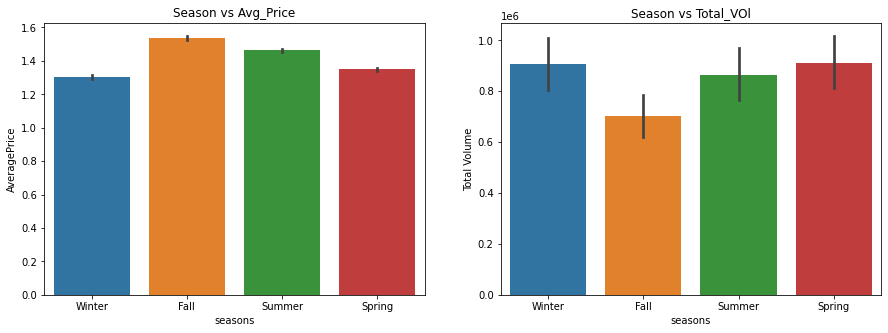

In [55]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(df['seasons'],df['AveragePrice'],ax=ax[0])
ax[0].set_title('Season vs Avg_Price')
sns.barplot(df['seasons'],df['Total Volume'],ax=ax[1])
ax[1].set_title('Season vs Total_VOl')

Fall and Summer witnessed high price ,maybe its because of less supply

<AxesSubplot:>

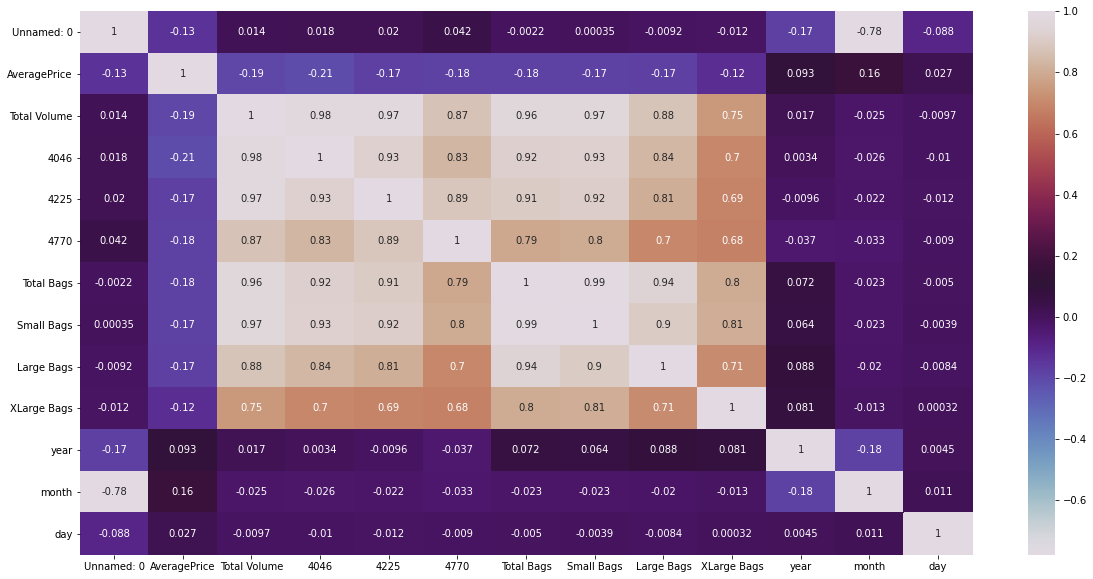

In [56]:
df['day']=df['Date'].dt.day
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='twilight')

In [86]:
df1=df.copy()

In [87]:
df1=df1[['Total Volume', 'Total Bags', 'type', 'year','region', 'month', 'day','AveragePrice']]

In [71]:
df1.columns

Index(['Total Volume', 'Total Bags', 'type', 'year', 'region', 'month', 'day',
       'AveragePrice'],
      dtype='object')

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

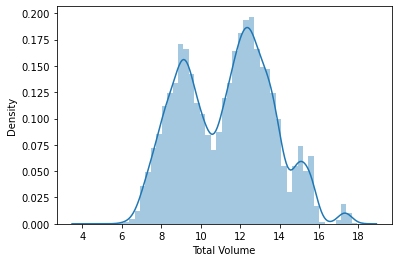

In [72]:
sns.distplot(np.log(df1['Total Volume']))

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

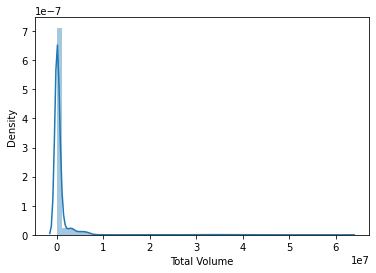

In [73]:
sns.distplot(df1['Total Volume'])

In [74]:
print(np.log(df1['Total Volume']).skew())
print(df1['Total Bags'].skew())#highly skewed , so using np.log

0.08795448426312895
9.756071670300289


In [88]:
df1['Total Volume']=np.log1p(df1['Total Volume'])
df1['Total Bags']=np.log1p(df1['Total Bags'])

In [76]:
df2 = df1.copy()  # backup

In [77]:
df2['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [80]:
df1.shape

(18249, 71)

In [89]:
df1=pd.get_dummies(df1,drop_first=True,columns=['type','region','month','year','day'])

In [90]:
df1.head()

Total Volume  Total Bags  AveragePrice  type_organic  region_Atlanta  \
0  11.070344     9.070833    1.33          0             0                
1  10.912867     9.159737    1.35          0             0                
2  11.680313     9.005325    0.93          0             0                
3  11.277116     8.667708    1.08          0             0                
4  10.840377     8.729874    1.28          0             0                

   region_BaltimoreWashington  region_Boise  region_Boston  \
0  0                           0             0               
1  0                           0             0               
2  0                           0             0               
3  0                           0             0               
4  0                           0             0               

   region_BuffaloRochester  region_California  region_Charlotte  \
0  0                        0                  0                  
1  0                        0                  0                  
2  0                        0                  0                  
3  0                        0                  0                  
4  0                        0                  0                  

   region_Chicago  region_CincinnatiDayton  region_Columbus  \
0  0               0                        0                 
1  0               0                        0                 
2  0               0                        0                 
3  0               0                        0                 
4  0               0                        0                 

   region_DallasFtWorth  region_Denver  region_Detroit  region_GrandRapids  \
0  0                     0              0               0                    
1  0                     0              0               0                    
2  0                     0              0               0                    
3  0                     0              0               0                    
4  0                     0              0               0                    

   region_GreatLakes  region_HarrisburgScranton  region_HartfordSpringfield  \
0  0                  0                          0                            
1  0                  0                          0                            
2  0                  0                          0                            
3  0                  0                          0                            
4  0                  0                          0                            

   region_Houston  region_Indianapolis  region_Jacksonville  region_LasVegas  \
0  0               0                    0                    0                 
1  0               0                    0                    0                 
2  0               0                    0                    0                 
3  0               0                    0                    0                 
4  0               0                    0                    0                 

   region_LosAngeles  region_Louisville  region_MiamiFtLauderdale  \
0  0                  0                  0                          
1  0                  0                  0                          
2  0                  0                  0                          
3  0                  0                  0                          
4  0                  0                  0                          

   region_Midsouth  region_Nashville  region_NewOrleansMobile  region_NewYork  \
0  0                0                 0                        0                
1  0                0                 0                        0                
2  0                0                 0                        0                
3  0                0                 0                        0                
4  0                0                 0                        0                

   region_Northeast  region_NorthernNewEngland  region_Orlando  \
0  0

In [112]:
df1.shape

(18249, 101)

In [94]:
X=df1.drop('AveragePrice',axis=1)
y=df1['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

### Modelling

In [96]:
lr=LinearRegression()
lr.fit(X_train,y_train)
predict=lr.predict(X_test)

In [97]:
print('mae ',mean_absolute_error(y_test,predict))
print('rmse ',np.sqrt(mean_squared_error(y_test,predict)))

mae  0.15143205875740332
rmse  0.2016725543253118


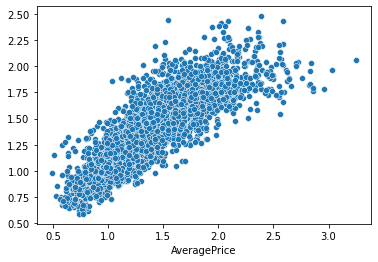

In [ ]:
sns.scatterplot(y_test,predict)

In [126]:
# let's do live prediction 
new_data = X.sample(10)

In [127]:
new_data.head()

Total Volume  Total Bags  type_organic  region_Atlanta  \
9604   9.394707      7.809842    1             0                
5401   11.093869     10.201805   0             0                
9517   8.139426      6.220411    1             0                
11702  7.219810      7.091085    1             0                
14315  11.370065     10.845141   1             0                

       region_BaltimoreWashington  region_Boise  region_Boston  \
9604   0                           0             0               
5401   0                           0             0               
9517   0                           0             0               
11702  0                           0             0               
14315  0                           0             0               

       region_BuffaloRochester  region_California  region_Charlotte  \
9604   0                        0                  0                  
5401   0                        0                  0                  
9517   0                        0                  1                  
11702  0                        0                  0                  
14315  0                        0                  0                  

       region_Chicago  region_CincinnatiDayton  region_Columbus  \
9604   0               1                        0                 
5401   0               0                        0                 
9517   0               0                        0                 
11702  0               0                        0                 
14315  0               0                        0                 

       region_DallasFtWorth  region_Denver  region_Detroit  \
9604   0                     0              0                
5401   0                     0              0                
9517   0                     0              0                
11702  0                     0              0                
14315  0                     0              0                

       region_GrandRapids  region_GreatLakes  region_HarrisburgScranton  \
9604   0                   0                  0                           
5401   0                   0                  0                           
9517   0                   0                  0                           
11702  0                   0                  0                           
14315  0                   0                  0                           

       region_HartfordSpringfield  region_Houston  region_Indianapolis  \
9604   0                           0               0                     
5401   0                           0               0                     
9517   0                           0               0                     
11702  0                           0               0                     
14315  0                           0               0                     

       region_Jacksonville  region_LasVegas  region_LosAngeles  \
9604   0                    0                0                   
5401   0                    0                0                   
9517   0                    0                0                   
11702  0                    0                0                   
14315  0                    0                0                   

       region_Louisville  region_MiamiFtLauderdale  region_Midsouth  \
9604   0                  0                         0                 
5401   0                  0                         0                 
9517   0                  0                         0                 
11702  0                  0                         0                 
14315  0                  0                         0                 

       region_Nashville  region_NewOrleansMobile  region_NewYork  \
9604   0                 0                        0                
5401   0                 0                        0                
9517   0                 0                        0                
11702  0                

In [128]:
np.exp(lr.predict(new_data))

array([4.20756837, 3.13748438, 7.41949037, 5.81629593, 3.66408611,
       3.38723156, 6.69035361, 3.43053261, 3.22559051, 2.5757955 ])

In [129]:
final_data = df[df.index.isin(new_data.index.values)]

In [130]:
final_data['PredictedAvergaePrice'] = np.exp(lr.predict(new_data))

In [131]:
final_data = final_data[['Date','Total Volume','Total Bags','type','year','region','month','seasons','AveragePrice','PredictedAvergaePrice']]

In [132]:
final_data['PriceDifference'] = abs(final_data['AveragePrice'] - final_data['PredictedAvergaePrice'])

In [133]:
final_data.head()

Date  Total Volume  Total Bags          type  year  \
2597 2015-01-18  40391.55      14818.36    conventional  2015   
4711 2016-05-22  689730.64     373566.24   conventional  2016   
5270 2016-08-21  87249.43      44049.45    conventional  2016   
5401 2016-02-14  65765.73      26950.79    conventional  2016   
6511 2017-02-05  348380.90     72537.39    conventional  2017   

                  region  month seasons  AveragePrice  PredictedAvergaePrice  \
2597  Syracuse            1      Winter  1.40          4.207568                
4711  Portland            5      Spring  0.78          3.137484                
5270  Spokane             8      Summer  1.09          7.419490                
5401  Syracuse            2      Winter  1.28          5.816296                
6511  HarrisburgScranton  2      Winter  1.14          3.664086                

      PriceDifference  
2597  2.807568         
4711  2.357484         
5270  6.329490         
5401  4.536296         
6511  2.524086